# Presentation of the Test Results

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Reading the cleaned data

In [ ]:
data = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
df = data[['salary','pay_period','work_type','experience_level','sponsored','company_size','category_ComplexOnsiteApply','category_OffsiteApply','category_SimpleOnsiteApply']]

## Selecting the features

In [ ]:
X = df[['experience_level','work_type']]
y = df['salary']

## Splitting the data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Scaling the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

## Top models from step 1,3,4

# Random Forest

In [ ]:
#Importing the RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating the model
random_forest_model = RandomForestRegressor(bootstrap = True, max_depth = 20, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 50, random_state=42)

# Training the model which is called fitting
random_forest_model.fit(X_train, y_train)

<ipython-input-8-4782e544905c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50, random_state=42)

In [ ]:
# predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Gradient Boosting

In [ ]:
#Importing the ensemble GradientBoostingRegressor from sklearn library
from sklearn.ensemble import GradientBoostingRegressor

# Creating the model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
gradient_boosting_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predicting on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# KNN

In [ ]:
#Importing the KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors=31)

# Training the model which is called fitting
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=31)

In [ ]:
#Predicting on test set
y_pred_knn = knn_model.predict(X_test)

## Models form step 5

# XG Boost

In [ ]:
# Importing the XGBRegressor from xgboost
from xgboost import XGBRegressor

# Creating the model
xgb_model = XGBRegressor(objective='reg:squarederror',
                      colsample_bytree=0.3,
                      learning_rate=0.1,
                      max_depth=5,
                      alpha=10,
                      n_estimators=100,
                      random_state=42)

# Training the model which is called fitting
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# predicting on the test set
y_pred_xgb = xgb_model.predict(X_test)

# ELM Model

In [ ]:
#Importing MLPRegressor from sklearn neural networks
from sklearn.neural_network import MLPRegressor

#Creating the model
elm_model = MLPRegressor(hidden_layer_sizes=(10,),activation='logistic',max_iter=1000,random_state=42)

#Training the model
elm_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
             random_state=42)

In [ ]:
#Predicting on test set
y_pred_elm = elm_model.predict(X_test)

# Deep Learning Model

In [ ]:
# Importing the Sequential and Dense models from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Creating the model
model = Sequential()

#Adding the two layers to the model
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

# Compiling the model using adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9427 - val_loss: 0.7745
Epoch 2/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9403 - val_loss: 0.7741
Epoch 3/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9392 - val_loss: 0.7832
Epoch 4/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9385 - val_loss: 0.7722
Epoch 5/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9379 - val_loss: 0.7804
Epoch 6/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9373 - val_loss: 0.7748
Epoch 7/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9363 - val_loss: 0.7806
Epoch 8/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9363 - val_loss: 0.7867
Epoch 9/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9367 - val_loss: 0.7754
Epoch 10/50
359/359 [==============================] - 0s 1ms/step - loss: 0.9363 - val_loss: 0.7698

In [ ]:
# Make predictions on the test data
y_pred_deep = model.predict(X_test)

45/45 [==============================] - 0s 976us/step


# Ensemble Model

In [ ]:
#Importing VotingRegressor from sklearn ensemble library
from sklearn.ensemble import VotingRegressor

# Creating the ensembel model with top 3 models
ensemble_model = VotingRegressor(estimators=[
    ('rf', random_forest_model),
    ('gb', gradient_boosting_model),
    ('knn', knn_model)
])

#Traing the model
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   n_estimators=50,
                                                   random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=31))])

In [ ]:
#Predicting on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# RESULTS

# Mean Squared Error

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE for Random Forest Model:", mse_rf)

mse_gb = mean_squared_error(y_test, y_pred_gradient_boosting)
print("MSE for Gradient Boosting Model:", mse_gb)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE for KNN Model:", mse_knn)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("MSE for XG Boost Model:", mse_xgb)

mse_elm = mean_squared_error(y_test, y_pred_elm)
print("MSE for ELM Model:", mse_elm)

mse_deep = mean_squared_error(y_test, y_pred_deep)
print("MSE for Deep Learning Model:", mse_deep)

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print("MSE for Ensemble Model:", mse_ensemble)

MSE for Random Forest Model: 0.7455107019147746
MSE for Gradient Boosting Model: 0.7452880212751156
MSE for KNN Model: 0.7508100984856952
MSE for XG Boost Model: 1.2995193555309528
MSE for ELM Model: 0.7832140330107683
MSE for Deep Learning Model: 0.7533567494729209
MSE for Ensemble Model: 0.7451408019945741


# R2 Score

In [ ]:
r2_rf = r2_score(y_test, y_pred_rf)
print("MSE for Random Forest Model:", r2_rf)

r2_gb = r2_score(y_test, y_pred_gradient_boosting)
print("MSE for Gradient Boosting Model:", r2_gb)

r2_knn = r2_score(y_test, y_pred_knn)
print("MSE for KNN Model:", r2_knn)

r2_xgb = r2_score(y_test, y_pred_xgb)
print("MSE for XG Boost Model:", r2_xgb)

r2_elm = r2_score(y_test, y_pred_elm)
print("MSE for ELM Model:", r2_elm)

r2_deep = r2_score(y_test, y_pred_deep)
print("MSE for Deep Learning Model:", r2_deep)

r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("MSE for Ensemble Model:", r2_ensemble)

MSE for Random Forest Model: 0.1238757530637139
MSE for Gradient Boosting Model: 0.12413744737236365
MSE for KNN Model: 0.11764790171565187
MSE for XG Boost Model: -0.5271952687190797
MSE for ELM Model: 0.07956679481720552
MSE for Deep Learning Model: 0.11465507723618829
MSE for Ensemble Model: 0.12431045948468822


In [ ]:
models = ['Random Forest', 'Gradient Boosting', 'KNN', 'XG Boost', 'ELM', 'Deep Learning', 'Ensemble']
mse_values = [mse_rf, mse_gb, mse_knn, mse_xgb, mse_elm, mse_deep, mse_ensemble]
r2_values = [r2_rf, r2_gb, r2_knn, r2_xgb, r2_elm, r2_deep, r2_ensemble]

# MSE Bar Plot

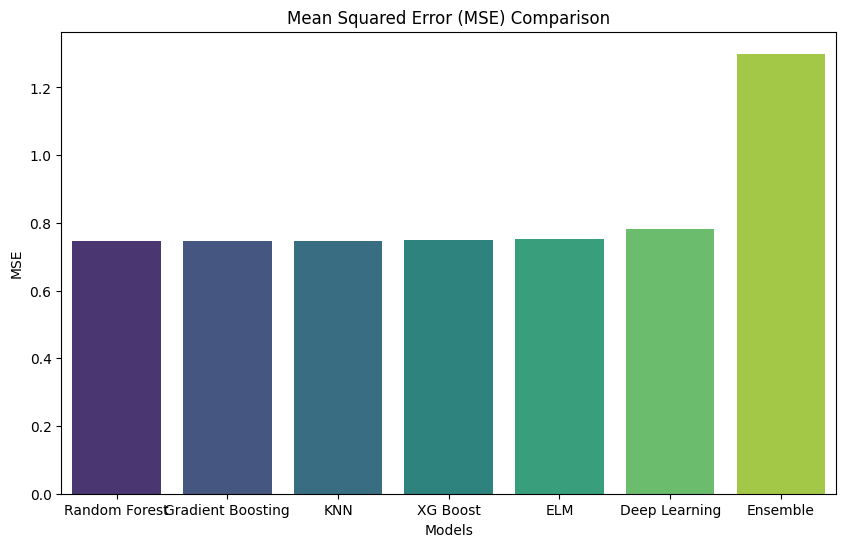

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=sorted(mse_values), palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

#R^2 Score Plot

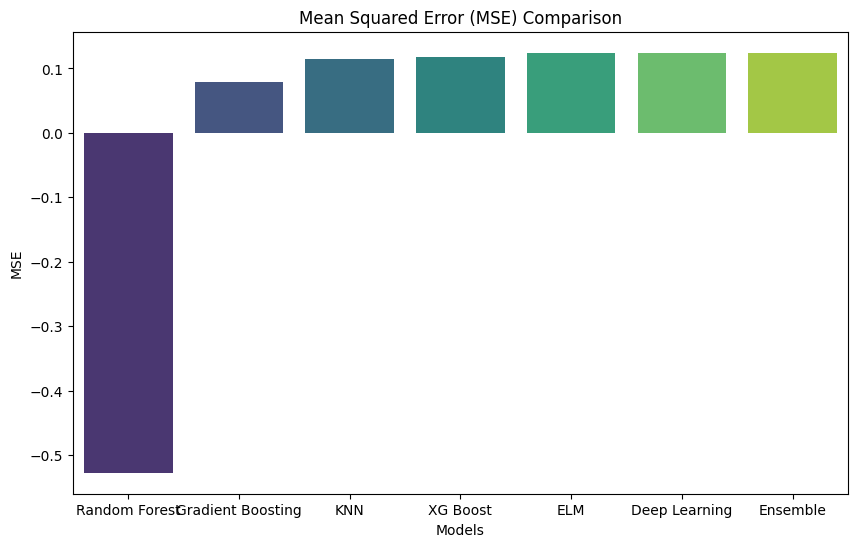

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=sorted(r2_values), palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

# Combined Bar Plot

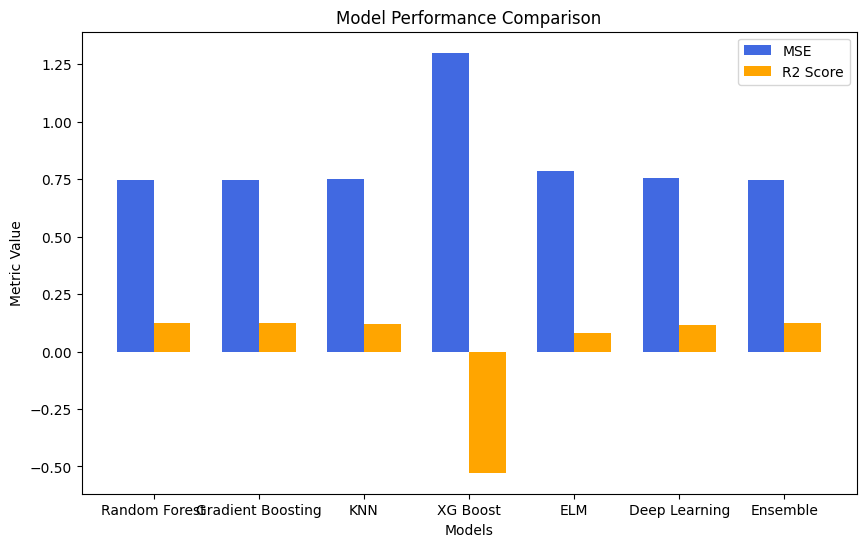

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
models_indices = np.arange(len(models))

bar1 = ax.bar(models_indices, mse_values, bar_width, label='MSE', color='royalblue')
bar2 = ax.bar(models_indices + bar_width, r2_values, bar_width, label='R2 Score', color='orange')

ax.set_xticks(models_indices + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.show()

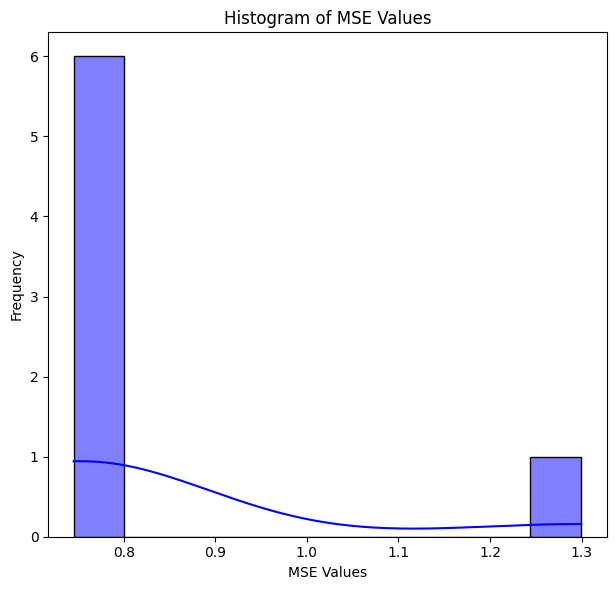

In [ ]:
# Histogram for MSE values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(mse_values, bins=10, kde=True, color='blue')
plt.title('Histogram of MSE Values')
plt.xlabel('MSE Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

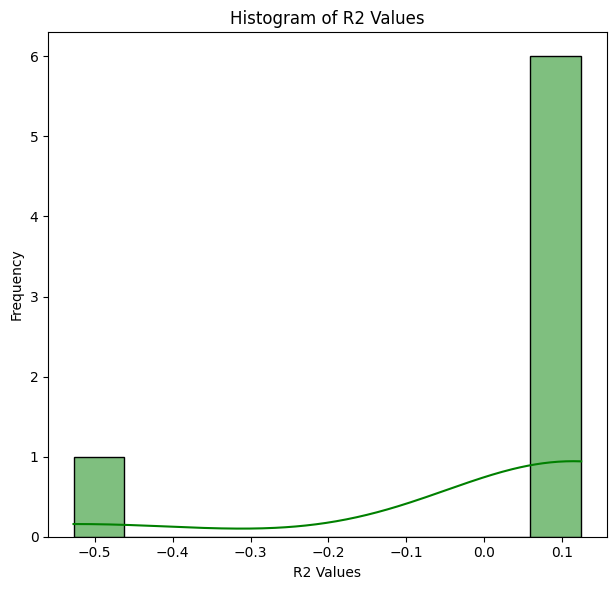

In [ ]:
# Histogram for R2 values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(r2_values, bins=10, kde=True, color='green')
plt.title('Histogram of R2 Values')
plt.xlabel('R2 Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Heatmap

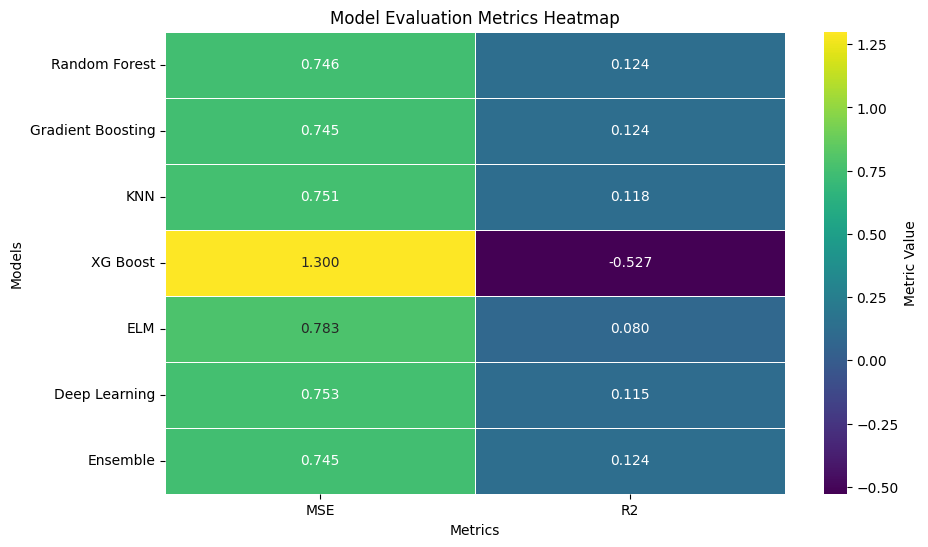

In [ ]:
heatmap_data = np.array([mse_values, r2_values])

heatmap_data = heatmap_data.T

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5,
            xticklabels=['MSE', 'R2'], yticklabels=models, cbar_kws={'label': 'Metric Value'})

plt.title('Model Evaluation Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()